# Lab Instructions

Create 3 visualizations from a spatial and time-series dataset of your choice.  Describe your dataset including where it came from and the features it contains.  Each visualization should be accompanied by at least 1 - 2 sentences explaining how the features do (or do not!) change over time and througout space.

In [12]:
import plotly.express as px
import pandas as pd

In [13]:
dailyPolution_df = pd.read_csv('daily_42602_2023_1.csv')

dailyPolution_df.head()

C:\Users\madin\AppData\Local\Temp\ipykernel_30452\3397266852.py:1: DtypeWarning:

Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.



,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,15,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",5/22/2024
1,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,8,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",5/22/2024
2,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,8,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",5/22/2024
3,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,27,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",5/22/2024
4,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,21,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",5/22/2024


In [14]:
df_ca = dailyPolution_df[dailyPolution_df['State Name'] == 'California']

df_la = df_ca[df_ca['County Name'] == 'Los Angeles']

df_la.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
14106,6,37,16,42602,1,34.14435,-117.85036,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,4,99,INSTRUMENTAL - GAS PHASE CHEMILUMINESCENCE,Glendora,"840 LAUREL, GLENDORA",California,Los Angeles,Glendora,"Los Angeles-Long Beach-Anaheim, CA",5/22/2024
14107,6,37,16,42602,1,34.14435,-117.85036,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,8,99,INSTRUMENTAL - GAS PHASE CHEMILUMINESCENCE,Glendora,"840 LAUREL, GLENDORA",California,Los Angeles,Glendora,"Los Angeles-Long Beach-Anaheim, CA",5/22/2024
14108,6,37,16,42602,1,34.14435,-117.85036,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,7,99,INSTRUMENTAL - GAS PHASE CHEMILUMINESCENCE,Glendora,"840 LAUREL, GLENDORA",California,Los Angeles,Glendora,"Los Angeles-Long Beach-Anaheim, CA",5/22/2024
14109,6,37,16,42602,1,34.14435,-117.85036,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,13,99,INSTRUMENTAL - GAS PHASE CHEMILUMINESCENCE,Glendora,"840 LAUREL, GLENDORA",California,Los Angeles,Glendora,"Los Angeles-Long Beach-Anaheim, CA",5/22/2024
14110,6,37,16,42602,1,34.14435,-117.85036,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,7,99,INSTRUMENTAL - GAS PHASE CHEMILUMINESCENCE,Glendora,"840 LAUREL, GLENDORA",California,Los Angeles,Glendora,"Los Angeles-Long Beach-Anaheim, CA",5/22/2024


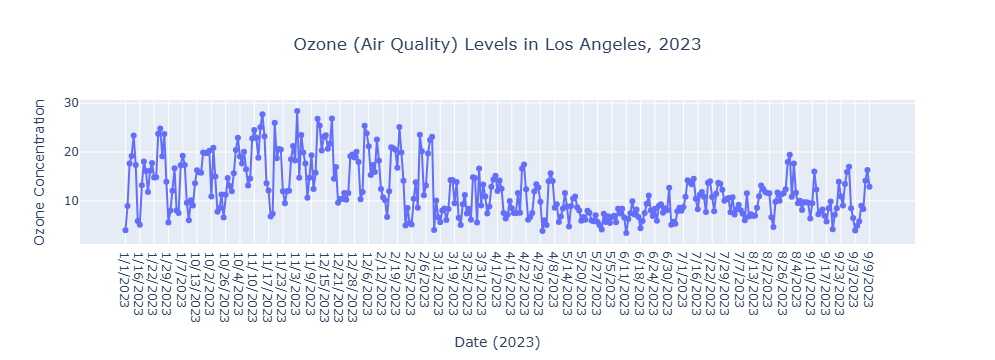

In [17]:
df_la_grouped = df_la.groupby('Date Local', as_index=False)['Arithmetic Mean'].mean()

fig = px.line(df_la_grouped,
              x='Date Local',
              y='Arithmetic Mean',
              title='Ozone (Air Quality) Levels in Los Angeles, 2023',
              labels={
                  'Date Local': 'Date',
                  'Arithmetic Mean': 'Ozone Concentration (Arithmetic Mean)'
              },
              markers=True)
fig.update_layout(
    title_x=0.5,
    xaxis_title='Date (2023)',
    yaxis_title='Ozone Concentration'
)

fig.show()

The line chart shows how ozone concentration in Los Angeles changes over time during 2023. Levels rise in the warmer summer months and drop in winter.

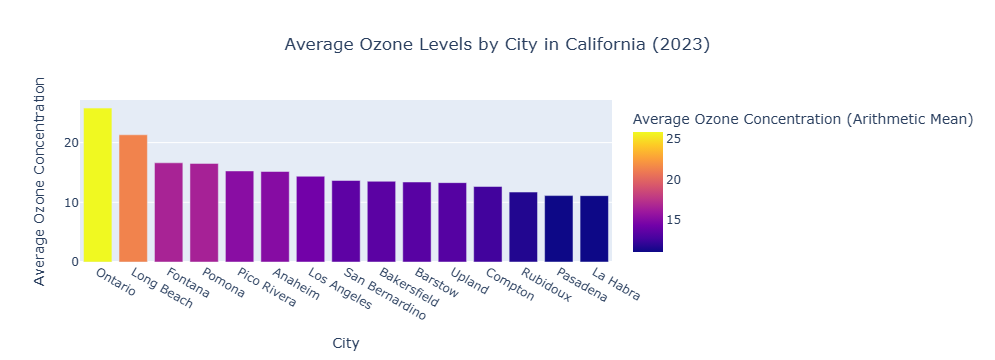

In [19]:
df_city_avg = df_ca.groupby('City Name', as_index=False)['Arithmetic Mean'].mean()

df_city_avg = df_city_avg.sort_values(by='Arithmetic Mean', ascending=False).head(15)

fig = px.bar(df_city_avg,
             x='City Name',
             y='Arithmetic Mean',
             title='Average Ozone Levels by City in California (2023)',
             labels={
                 'City Name': 'City',
                 'Arithmetic Mean': 'Average Ozone Concentration (Arithmetic Mean)'
             },
             color='Arithmetic Mean')

fig.update_layout(
    title_x=0.5,
    xaxis_title='City',
    yaxis_title='Average Ozone Concentration'
    
)

fig.show()

The bar chart compares average ozone concentrations across major California cities in 2023.

In [26]:

df['Date Local'] = pd.to_datetime(df['Date Local'])
df['Month'] = df['Date Local'].dt.to_period('M').dt.to_timestamp()

monthly = (df.groupby(['City Name','Month'], as_index=False)
             .agg(Ozone=('Arithmetic Mean','mean'),
                  Latitude=('Latitude','mean')))

fig = px.scatter(monthly,
                 x='Latitude',
                 y='Ozone',
                 color='City Name',
                 hover_name='City Name',
                 animation_frame='Month')
fig.show()

The animation shows how ozone levels change across California cities during 2023. Southern cities have higher ozone, while northern ones stay cleaner, showing changes over time and place.